<a href="https://colab.research.google.com/github/anamarine/TFM/blob/main/Data_Preparation_YoloV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#M.Sc. Health & Medical Data Analytics - Master Thesis

**Implementation of a Deep Learning-based Tool for Panoramic Dental X-ray Automatic Segmentation**

#Ana Marín Estañ

#1. Install & Import


*  Torch
*  Fiftyone
*  YoloV5

https://blog.paperspace.com/train-yolov5-custom-data/



In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 12173, done.
remote: Total 12173 (delta 0), reused 0 (delta 0), pack-reused 12173
Receiving objects: 100% (12173/12173), 11.96 MiB | 22.31 MiB/s, done.
Resolving deltas: 100% (8428/8428), done.
/content/yolov5
     |████████████████████████████████| 596 kB 19.8 MB/s 


In [2]:
import torch
from yolov5 import utils
display = utils.notebook_init()  #checks

YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.4/107.7 GB disk)


In [3]:
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

#2. Data Import

Data is given in the following format:

* data folder with .jpg raw images
* annotations aboute those images i na json file: labels.json

I have to transform the annotation file into an understandable format for yolov5. To achieve that I have to:
1.  Transform given annotations to PASCAL VOC format: stores its annotation in XML files where various attributes are described by tags. Let us look at one such annotation file.
2.  YOLO v5 expects annotations for each image in form of a .txt file where each line of the text file describes a bounding box. Consider the following image. https://blog.paperspace.com/train-yolov5-custom-data/


How to transform annotated dataset from json to XML (used by Pascal VOC)

Commented bc you only need to use it once

https://github.com/LI-NA/coco-json-converter

In [4]:
#cd /content/drive/MyDrive/TFM/dataset
#!python coco_to_xml.py --coco_json=labels.json --coco_folder=data --save_xml=labels_xml --database_name=Database


Directroies to dataset - .jpg + .json labels
*  data_path - The directory containing the source images
*  labels_path - The path to the COCO XML labels 

In [5]:
data_path = "/content/drive/MyDrive/TFM/dataset/data/"
all_labels_path = "/content/drive/MyDrive/TFM/dataset/panoramic_xray_all_labels.json"
tooth_labels_path = "/content/drive/MyDrive/TFM/dataset/panoramic_xray_labels_Tooth.json"
all_labels_but_tooth_path = "/content/drive/MyDrive/TFM/dataset/panoramic_xray_all_labels_but_tooth.json"

# 3. Labels: json to xml (Pascal VOC format, coco-friendly)

```
cd /content/drive/MyDrive/TFM/dataset

!python coco_to_xml.py --coco_json=panoramic_xray_all_labels.json --coco_folder=data --save_xml=all_labels_xml --database_name=Database

!python coco_to_xml.py --coco_json=panoramic_xray_all_labels_but_tooth.json --coco_folder=data --save_xml=all_labels_but_tooth_xml --database_name=Database

!python coco_to_xml.py --coco_json=panoramic_xray_labels_Tooth.json --coco_folder=data --save_xml=tooth_labels_xml --database_name=Database
```

In [6]:
cd /content/drive/MyDrive/TFM/dataset_for_prep/

/content/drive/MyDrive/TFM/dataset_for_prep


In [7]:
!python coco_to_xml.py --coco_json=labels_json/panoramic_xray_all_labels.json --coco_folder=data --save_xml=all_labels_xml --database_name=Database

loading annotations into memory...
Done (t=1.05s)
creating index...
index created!
Write annotations file...
Write xml files (1 / 265)
Write xml files (2 / 265)
Write xml files (3 / 265)
Write xml files (4 / 265)
Write xml files (5 / 265)
Write xml files (6 / 265)
Write xml files (7 / 265)
Write xml files (8 / 265)
Write xml files (9 / 265)
Write xml files (10 / 265)
Write xml files (11 / 265)
Write xml files (12 / 265)
Write xml files (13 / 265)
Write xml files (14 / 265)
Write xml files (15 / 265)
Write xml files (16 / 265)
Write xml files (17 / 265)
Write xml files (18 / 265)
Write xml files (19 / 265)
Write xml files (20 / 265)
Write xml files (21 / 265)
Write xml files (22 / 265)
Write xml files (23 / 265)
Write xml files (24 / 265)
Write xml files (25 / 265)
Write xml files (26 / 265)
Write xml files (27 / 265)
Write xml files (28 / 265)
Write xml files (29 / 265)
Write xml files (30 / 265)
Write xml files (31 / 265)
Write xml files (32 / 265)
Write xml files (33 / 265)
Write xml

In [8]:
!python coco_to_xml.py --coco_json=labels_json/panoramic_xray_all_labels_but_tooth.json --coco_folder=data --save_xml=all_labels_but_tooth_xml --database_name=Database

loading annotations into memory...
Done (t=0.56s)
creating index...
index created!
Write annotations file...
Write xml files (1 / 245)
Write xml files (2 / 245)
Write xml files (3 / 245)
Write xml files (4 / 245)
Write xml files (5 / 245)
Write xml files (6 / 245)
Write xml files (7 / 245)
Write xml files (8 / 245)
Write xml files (9 / 245)
Write xml files (10 / 245)
Write xml files (11 / 245)
Write xml files (12 / 245)
Write xml files (13 / 245)
Write xml files (14 / 245)
Write xml files (15 / 245)
Write xml files (16 / 245)
Write xml files (17 / 245)
Write xml files (18 / 245)
Write xml files (19 / 245)
Write xml files (20 / 245)
Write xml files (21 / 245)
Write xml files (22 / 245)
Write xml files (23 / 245)
Write xml files (24 / 245)
Write xml files (25 / 245)
Write xml files (26 / 245)
Write xml files (27 / 245)
Write xml files (28 / 245)
Write xml files (29 / 245)
Write xml files (30 / 245)
Write xml files (31 / 245)
Write xml files (32 / 245)
Write xml files (33 / 245)
Write xml

In [9]:
!python coco_to_xml.py --coco_json=labels_json/panoramic_xray_labels_Tooth.json --coco_folder=data --save_xml=tooth_labels_xml --database_name=Database

loading annotations into memory...
Done (t=0.76s)
creating index...
index created!
Write annotations file...
Write xml files (1 / 265)
Write xml files (2 / 265)
Write xml files (3 / 265)
Write xml files (4 / 265)
Write xml files (5 / 265)
Write xml files (6 / 265)
Write xml files (7 / 265)
Write xml files (8 / 265)
Write xml files (9 / 265)
Write xml files (10 / 265)
Write xml files (11 / 265)
Write xml files (12 / 265)
Write xml files (13 / 265)
Write xml files (14 / 265)
Write xml files (15 / 265)
Write xml files (16 / 265)
Write xml files (17 / 265)
Write xml files (18 / 265)
Write xml files (19 / 265)
Write xml files (20 / 265)
Write xml files (21 / 265)
Write xml files (22 / 265)
Write xml files (23 / 265)
Write xml files (24 / 265)
Write xml files (25 / 265)
Write xml files (26 / 265)
Write xml files (27 / 265)
Write xml files (28 / 265)
Write xml files (29 / 265)
Write xml files (30 / 265)
Write xml files (31 / 265)
Write xml files (32 / 265)
Write xml files (33 / 265)
Write xml

# 4. Labels: xml to txt (yoloV5-friendly)

We now write a function that will take the annotations in VOC format and convert them to a format where information about the bounding boxes are stored in a dictionary.

In [10]:
# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [11]:
info_dict_all = extract_info_from_xml('all_labels_xml/188_copia.xml')

In [12]:
info_dict_tooth = extract_info_from_xml('tooth_labels_xml/188_copia.xml')

In [13]:
info_dict_all_but_tooth = extract_info_from_xml('all_labels_but_tooth_xml/188_copia.xml')

In [14]:
info_dict_tooth

{'bboxes': [{'class': 'Tooth',
   'xmax': 953,
   'xmin': 820,
   'ymax': 750,
   'ymin': 605},
  {'class': 'Tooth', 'xmax': 1053, 'xmin': 899, 'ymax': 740, 'ymin': 615},
  {'class': 'Tooth', 'xmax': 1156, 'xmin': 1065, 'ymax': 812, 'ymin': 608},
  {'class': 'Tooth', 'xmax': 1204, 'xmin': 1121, 'ymax': 838, 'ymin': 551},
  {'class': 'Tooth', 'xmax': 1284, 'xmin': 1199, 'ymax': 826, 'ymin': 589},
  {'class': 'Tooth', 'xmax': 1361, 'xmin': 1279, 'ymax': 841, 'ymin': 596},
  {'class': 'Tooth', 'xmax': 1448, 'xmin': 1344, 'ymax': 847, 'ymin': 581},
  {'class': 'Tooth', 'xmax': 1516, 'xmin': 1438, 'ymax': 829, 'ymin': 607},
  {'class': 'Tooth', 'xmax': 1598, 'xmin': 1498, 'ymax': 855, 'ymin': 569},
  {'class': 'Tooth', 'xmax': 1664, 'xmin': 1576, 'ymax': 837, 'ymin': 599},
  {'class': 'Tooth', 'xmax': 1763, 'xmin': 1635, 'ymax': 850, 'ymin': 627},
  {'class': 'Tooth', 'xmax': 1885, 'xmin': 1753, 'ymax': 837, 'ymin': 615},
  {'class': 'Tooth', 'xmax': 1991, 'xmin': 1866, 'ymax': 796, 'ymin':

We now write a function to convert information contained in info_dict to YOLO v5 style annotations and write them to a txt file. In case your annotations are different than PASCAL VOC ones, you can write a function to convert them to the info_dict format and use the function below to convert them to YOLO v5 style annotations.

I get the id mappings from the category list in the json file

# Dictionary that maps class names to ID
```
class_name_to_id_mapping = {"Tooth": 3,
                            "Metal (Implant)": 4,
                            "Metal": 6,
                            "Maxilla": 7,
                            "Mandible": 8,
                            "Inferior Alveolar Nerve": 9,
                            "Maxillary Sinus": 12,
                            "Plastic Restoration": 36,
                            "Endodontic Treatment": 37,
                            "Crown/Pontic": 38,
                            "Metallic Restoration": 39,
                            "Screw": 40,
                            "Supernumerary": 41
                            }
 ```

In [15]:
# Dictionary that maps class names to ID

class_name_to_id_mapping_1 = {"Tooth": 0,
                            "Metal (Implant)": 1,
                            "Metal": 2,
                            "Maxilla": 3,
                            "Mandible": 4,
                            "Inferior Alveolar Nerve": 5,
                            "Maxillary Sinus": 6,
                            "Plastic Restoration": 7,
                            "Endodontic Treatment": 8,
                            "Crown/Pontic": 9,
                            "Metallic Restoration": 10,
                            "Screw": 11,
                            "Supernumerary": 12}

class_name_to_id_mapping_2 = {"Tooth": 0}

class_name_to_id_mapping_3 = {"Metal (Implant)": 0,
                            "Metal": 1,
                            "Maxilla": 2,
                            "Mandible": 3,
                            "Inferior Alveolar Nerve": 4,
                            "Maxillary Sinus": 5,
                            "Plastic Restoration": 6,
                            "Endodontic Treatment": 7,
                            "Crown/Pontic": 8,
                            "Metallic Restoration": 9,
                            "Screw": 10,
                            "Supernumerary": 11}

In [16]:
# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict, labels_xml, mapping):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join(labels_xml, info_dict["filename"].replace("jpg", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [17]:
txt_1 = convert_to_yolov5(info_dict_all, "all_labels_xml", class_name_to_id_mapping_1)

In [18]:
txt_1

## 4.1. All labels

In [19]:
# Get the annotations
all_annotations = [os.path.join('all_labels_xml', x) for x in os.listdir('all_labels_xml') if x[-3:] == "xml"]
all_annotations.sort()

# Convert and save the annotations
for ann in tqdm(all_annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict, 'all_labels_xml', class_name_to_id_mapping_1)
all_annotations = [os.path.join('all_labels_xml', x) for x in os.listdir('all_labels_xml') if x[-3:] == "txt"]

100%|██████████| 265/265 [00:04<00:00, 54.91it/s] 


## 4.2. Tooth labels

In [20]:
# Get the annotations
tooth_annotations = [os.path.join('tooth_labels_xml', x) for x in os.listdir('tooth_labels_xml') if x[-3:] == "xml"]
tooth_annotations.sort()

# Convert and save the annotations
for ann in tqdm(tooth_annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict, "tooth_labels_xml", class_name_to_id_mapping_2)
tooth_annotations = [os.path.join('tooth_labels_xml', x) for x in os.listdir('tooth_labels_xml') if x[-3:] == "txt"]

100%|██████████| 265/265 [00:04<00:00, 61.35it/s]


## 4.3. All-but-tooth labels

In [21]:
# Get the annotations
all_annotations_but_tooth = [os.path.join('all_labels_but_tooth_xml', x) for x in os.listdir('all_labels_but_tooth_xml') if x[-3:] == "xml"]
all_annotations_but_tooth.sort()

# Convert and save the annotations
for ann in tqdm(all_annotations_but_tooth):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict, "all_labels_but_tooth_xml", class_name_to_id_mapping_3)
all_annotations_but_tooth = [os.path.join('all_labels_but_tooth_xml', x) for x in os.listdir('all_labels_but_tooth_xml') if x[-3:] == "txt"]

100%|██████████| 245/245 [00:03<00:00, 63.64it/s] 


Test

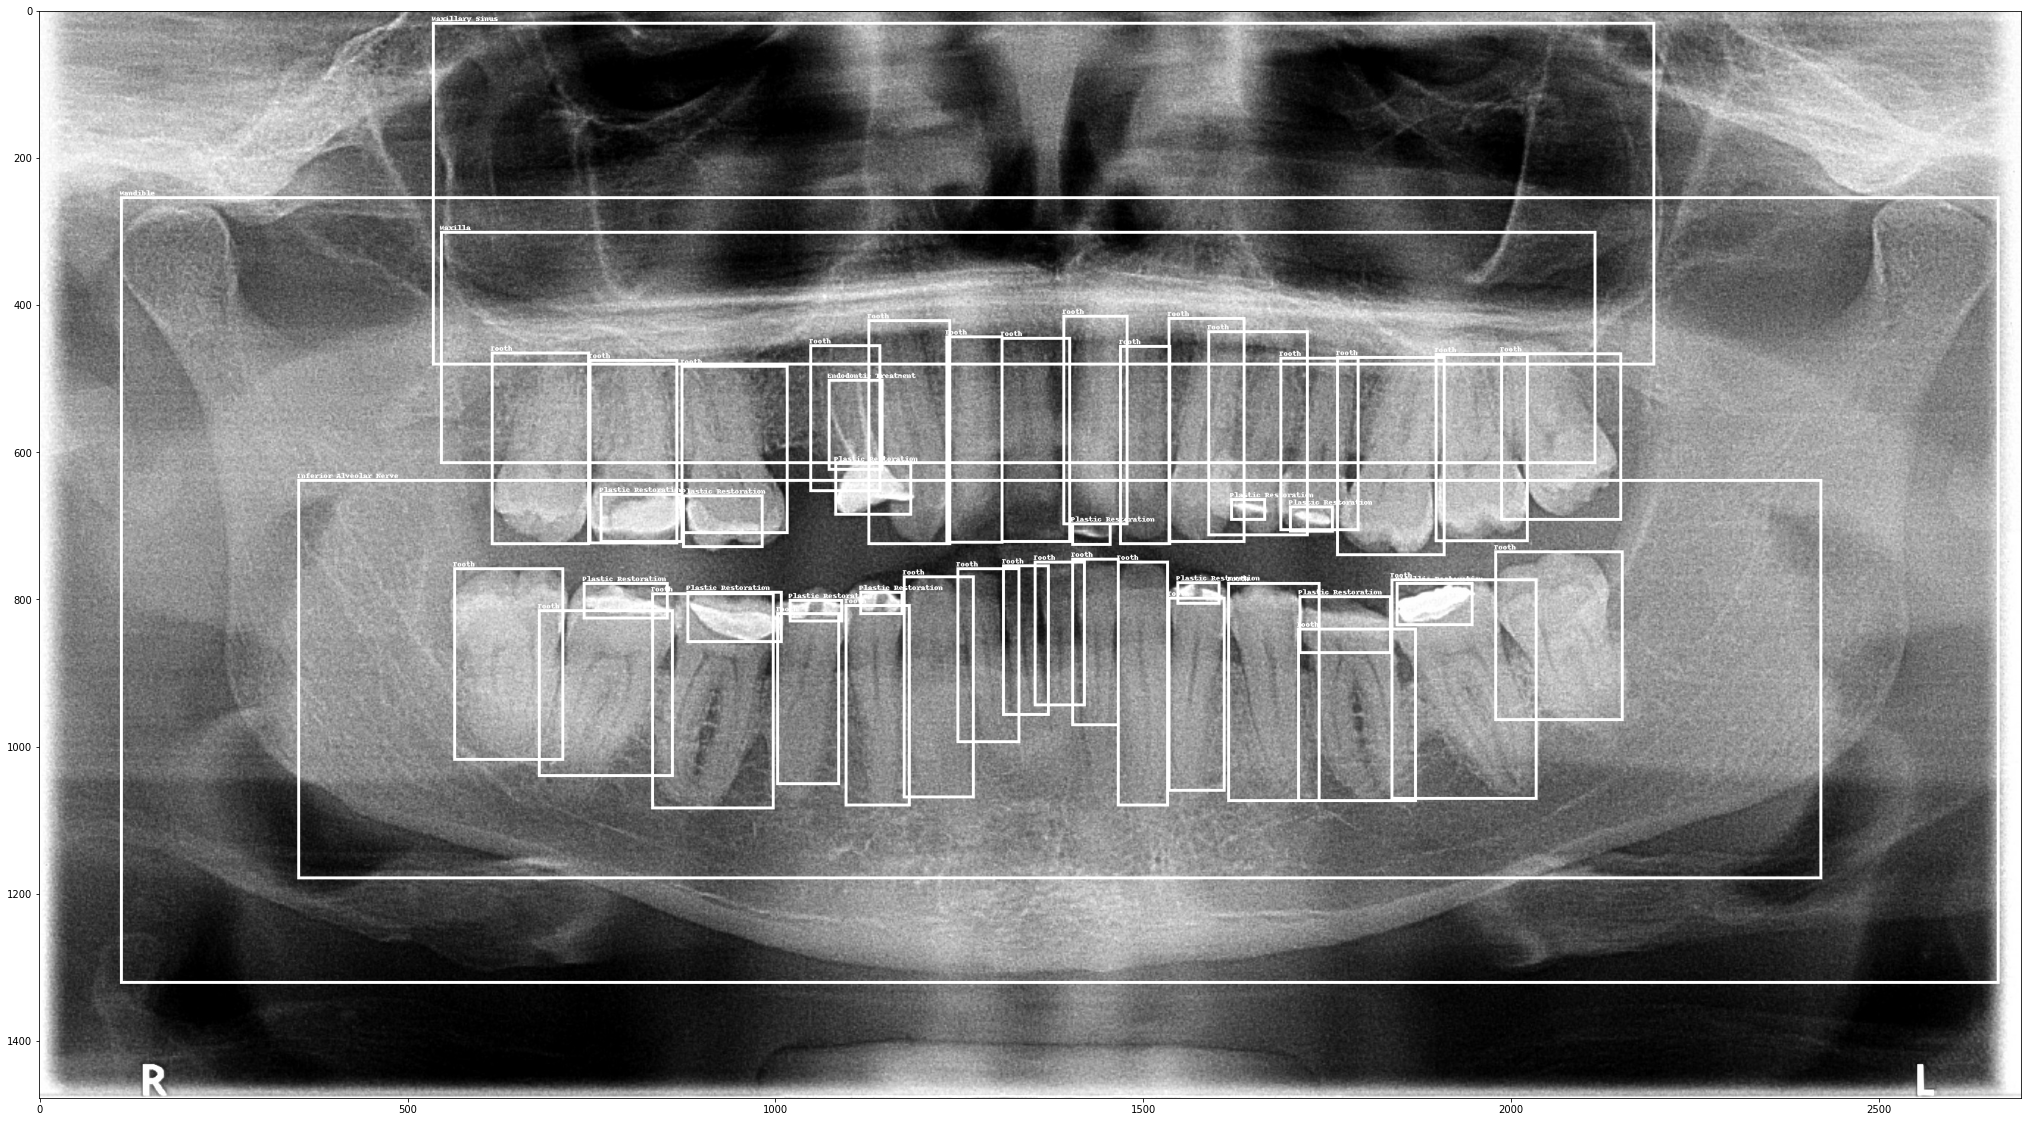

In [22]:
random.seed(1)

class_id_to_name_mapping_1 = dict(zip(class_name_to_id_mapping_1.values(), class_name_to_id_mapping_1.keys()))
class_id_to_name_mapping_2 = dict(zip(class_name_to_id_mapping_2.values(), class_name_to_id_mapping_2.keys()))
class_id_to_name_mapping_3 = dict(zip(class_name_to_id_mapping_3.values(), class_name_to_id_mapping_3.keys()))

def plot_bounding_box(image, annotation_list, class_id_to_name_mapping):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)), width=4)
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.figure(figsize = (60, 20))
    plt.imshow(np.array(image), cmap='gray')
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(all_annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("all_labels_xml", "data").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list, class_id_to_name_mapping_1)

# 5. Partition the Dataset

When actually trying to make the partitions, the length of the image and annotation arrays do not match: len images > len annotations, i.e., we have more images than annotations. Bc not all images are anotated yet.


Quick fix: go to drive folder and remove those png without annotation files. Didn't spend more time on that bc all images should be annotated at some point.


Next we partition the dataset into train, validation, and test sets containing 80%, 10%, and 10% of the data, respectively. You can change the split values according to your convenience.

Create the folders to keep the splits and Move the files to their respective folders.



In [23]:
cd

/root


In [24]:
cd /content/drive/MyDrive/TFM/dataset_for_prep/

/content/drive/MyDrive/TFM/dataset_for_prep


In [25]:
all_label_names = [label.replace("all_labels_xml/", "").replace("_copia.txt","") for label in all_annotations]
tooth_label_names = [label.replace("tooth_labels_xml/", "").replace("_copia.txt","") for label in tooth_annotations]
all_label_names_but_tooth = [label.replace("all_labels_but_tooth_xml/", "").replace("_copia.txt","") for label in all_annotations_but_tooth]

In [26]:
# Read images and annotations
all_images = [os.path.join('data', x) for x in os.listdir('data') if (x[-3:] == "jpg" and (x.replace("_copia.jpg", "") in all_label_names))]
all_images.sort()
all_annotations.sort()

tooth_images = [os.path.join('data', x) for x in os.listdir('data') if (x[-3:] == "jpg" and (x.replace("_copia.jpg", "") in tooth_label_names))]
tooth_images.sort()
tooth_annotations.sort()

all_images_but_tooth = [os.path.join('data', x) for x in os.listdir('data') if (x[-3:] == "jpg" and (x.replace("_copia.jpg", "") in all_label_names_but_tooth))]
all_images_but_tooth.sort()
all_annotations_but_tooth.sort()

In [27]:
len(all_images), len(all_annotations), len(all_images_but_tooth), len(all_annotations_but_tooth), len(tooth_images), len(tooth_annotations)

(265, 265, 245, 245, 265, 265)

In [30]:
print(all_images)

['data/100_copia.jpg', 'data/101_copia.jpg', 'data/102_copia.jpg', 'data/103_copia.jpg', 'data/104_copia.jpg', 'data/105_copia.jpg', 'data/106_copia.jpg', 'data/107_copia.jpg', 'data/108_copia.jpg', 'data/109_copia.jpg', 'data/10_copia.jpg', 'data/110_copia.jpg', 'data/111_copia.jpg', 'data/112_copia.jpg', 'data/113_copia.jpg', 'data/114_copia.jpg', 'data/115_copia.jpg', 'data/116_copia.jpg', 'data/117_copia.jpg', 'data/118_copia.jpg', 'data/119_copia.jpg', 'data/11_copia.jpg', 'data/120_copia.jpg', 'data/121_copia.jpg', 'data/122_copia.jpg', 'data/123_copia.jpg', 'data/124_copia.jpg', 'data/125_copia.jpg', 'data/126_copia.jpg', 'data/127_copia.jpg', 'data/128_copia.jpg', 'data/129_copia.jpg', 'data/12_copia.jpg', 'data/130_copia.jpg', 'data/131_copia.jpg', 'data/132_copia.jpg', 'data/133_copia.jpg', 'data/134_copia.jpg', 'data/135_copia.jpg', 'data/136_copia.jpg', 'data/137_copia.jpg', 'data/138_copia.jpg', 'data/139_copia.jpg', 'data/13_copia.jpg', 'data/140_copia.jpg', 'data/141_cop

In [61]:
print(all_images_but_tooth)

['data/100_copia.jpg', 'data/101_copia.jpg', 'data/102_copia.jpg', 'data/103_copia.jpg', 'data/104_copia.jpg', 'data/105_copia.jpg', 'data/106_copia.jpg', 'data/107_copia.jpg', 'data/108_copia.jpg', 'data/109_copia.jpg', 'data/10_copia.jpg', 'data/110_copia.jpg', 'data/111_copia.jpg', 'data/112_copia.jpg', 'data/113_copia.jpg', 'data/114_copia.jpg', 'data/115_copia.jpg', 'data/116_copia.jpg', 'data/117_copia.jpg', 'data/118_copia.jpg', 'data/119_copia.jpg', 'data/11_copia.jpg', 'data/120_copia.jpg', 'data/121_copia.jpg', 'data/122_copia.jpg', 'data/123_copia.jpg', 'data/124_copia.jpg', 'data/125_copia.jpg', 'data/126_copia.jpg', 'data/127_copia.jpg', 'data/128_copia.jpg', 'data/129_copia.jpg', 'data/12_copia.jpg', 'data/130_copia.jpg', 'data/131_copia.jpg', 'data/132_copia.jpg', 'data/133_copia.jpg', 'data/134_copia.jpg', 'data/135_copia.jpg', 'data/136_copia.jpg', 'data/137_copia.jpg', 'data/138_copia.jpg', 'data/139_copia.jpg', 'data/13_copia.jpg', 'data/140_copia.jpg', 'data/141_cop

In [62]:
file_numbers_tooth = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 10, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 11, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 12, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 13, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 14, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 15, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 16, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 17, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 18, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 19, 1, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 20, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 21, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 22, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 23, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 24, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 25, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 26, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 27, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 28, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 29, 2, 300, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 3, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 4, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 5, 60, 61, 62, 63, 64, 65, 66, 67, 68]
file_numbers_but_tooth = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 10, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 11, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 12, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 13, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 14, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 15, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 16, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 17, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 18, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 19, 1, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 20, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 21, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 22, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 23, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 24, 251, 252, 253, 254, 255, 256, 257, 258, 25, 260, 262, 263, 265, 266, 267, 268, 269, 26, 273, 274, 275, 276, 277, 278, 27, 280, 281, 282, 283, 284, 286, 287, 288, 289, 28, 290, 291, 292, 293, 294, 295, 296, 298, 299, 29, 300, 32, 33, 34, 35, 36, 37, 38, 3, 40, 42, 43, 44, 45, 46, 47, 49, 4, 51, 53, 54, 55, 56, 58, 59, 5, 60, 61, 62, 64, 65, 66, 67, 68]

In [63]:
file_numbers_tooth.sort()
file_numbers_but_tooth.sort()

In [64]:
numbers = np.arange(1, 300, 1, dtype=int)
numbers = numbers.tolist()
len(numbers), len(file_numbers_tooth), len(file_numbers_but_tooth)

(299, 265, 245)

In [65]:
missing_annotations_tooth = [x for x in numbers if x not in file_numbers_tooth]
missing_annotations_but_tooth = [x for x in numbers if x not in file_numbers_but_tooth]
len(missing_annotations_tooth), print(missing_annotations_tooth)

[6, 7, 8, 9, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


(35, None)

In [66]:
len(missing_annotations_but_tooth), print(missing_annotations_but_tooth)

[2, 6, 7, 8, 9, 30, 31, 39, 41, 48, 50, 52, 57, 63, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 250, 259, 261, 264, 270, 271, 272, 279, 285, 297]


(55, None)

## 5.1. All

In [67]:
# Split the dataset into train-valid-test splits 
all_train_images, all_val_images, all_train_annotations, all_val_annotations = train_test_split(all_images, all_annotations, test_size = 0.1, random_state = 1)
#all_val_images, all_test_images, all_val_annotations, all_test_annotations = train_test_split(all_val_images, all_val_annotations, test_size = 0.5, random_state = 1)

In [70]:
all_det_images = ['data/6_copia.jpg', 'data/7_copia.jpg', 'data/8_copia.jpg', 'data/9_copia.jpg', 'data/69_copia.jpg', 'data/70_copia.jpg', 'data/71_copia.jpg', 'data/72_copia.jpg', 'data/73_copia.jpg', 'data/74_copia.jpg', 'data/75_copia.jpg', 'data/76_copia.jpg', 'data/77_copia.jpg', 'data/78_copia.jpg', 'data/79_copia.jpg', 'data/80_copia.jpg', 'data/81_copia.jpg', 'data/82_copia.jpg', 'data/83_copia.jpg', 'data/84_copia.jpg', 'data/85_copia.jpg', 'data/86_copia.jpg', 'data/87_copia.jpg', 'data/88_copia.jpg', 'data/89_copia.jpg', 'data/90_copia.jpg', 'data/91_copia.jpg', 'data/92_copia.jpg', 'data/93_copia.jpg', 'data/94_copia.jpg', 'data/95_copia.jpg', 'data/96_copia.jpg', 'data/97_copia.jpg', 'data/98_copia.jpg', 'data/99_copia.jpg']

In [74]:
len(all_train_images), len(all_val_images), len(all_det_images)

(238, 27, 35)

## 5.2. Tooth

In [75]:
# Split the dataset into train-valid-test splits 
tooth_train_images, tooth_val_images, tooth_train_annotations, tooth_val_annotations = train_test_split(tooth_images, tooth_annotations, test_size = 0.1, random_state = 1)
#tooth_val_images, tooth_test_images, tooth_val_annotations, tooth_test_annotations = train_test_split(tooth_val_images, tooth_val_annotations, test_size = 0.5, random_state = 1)

In [76]:
tooth_det_images = all_det_images

In [77]:
len(tooth_train_images), len(tooth_val_images), len(tooth_det_images)

(238, 27, 35)

## 5.1. All

In [80]:
# Split the dataset into train-valid-test splits 
all_but_tooth_train_images, all_but_tooth_val_images, all_but_tooth_train_annotations, all_but_tooth_val_annotations = train_test_split(all_images_but_tooth, all_annotations_but_tooth, test_size = 0.1, random_state = 1)
#all_but_tooth_val_images, all_but_tooth_test_images, all_val_but_tooth_annotations, all_but_tooth_test_annotations = train_test_split(all_but_tooth_val_images, all_but_tooth_val_annotations, test_size = 0.5, random_state = 1)

In [81]:
all_but_tooth_det_images = ['data/2_copia.jpg', 'data/6_copia.jpg', 'data/7_copia.jpg', 'data/8_copia.jpg', 'data/9_copia.jpg', 'data/30_copia.jpg', 'data/31_copia.jpg', 'data/39_copia.jpg', 'data/41_copia.jpg', 'data/48_copia.jpg', 'data/50_copia.jpg', 'data/52_copia.jpg', 'data/57_copia.jpg', 'data/63_copia.jpg', 'data/69_copia.jpg', 'data/70_copia.jpg', 'data/71_copia.jpg', 'data/72_copia.jpg', 'data/73_copia.jpg', 'data/74_copia.jpg', 'data/75_copia.jpg', 'data/76_copia.jpg', 'data/77_copia.jpg', 'data/78_copia.jpg', 'data/79_copia.jpg', 'data/80_copia.jpg', 'data/81_copia.jpg', 'data/82_copia.jpg', 'data/83_copia.jpg', 'data/84_copia.jpg', 'data/85_copia.jpg', 'data/86_copia.jpg', 'data/87_copia.jpg', 'data/88_copia.jpg', 'data/89_copia.jpg', 'data/90_copia.jpg', 'data/91_copia.jpg', 'data/92_copia.jpg', 'data/93_copia.jpg', 'data/94_copia.jpg', 'data/95_copia.jpg', 'data/96_copia.jpg', 'data/97_copia.jpg', 'data/98_copia.jpg', 'data/99_copia.jpg', 'data/250_copia.jpg', 'data/259_copia.jpg', 'data/261_copia.jpg', 'data/264_copia.jpg', 'data/270_copia.jpg', 'data/271_copia.jpg', 'data/272_copia.jpg', 'data/279_copia.jpg', 'data/285_copia.jpg', 'data/297_copia.jpg']

In [82]:
len(all_but_tooth_train_images), len(all_but_tooth_val_images), len(all_but_tooth_det_images)

(220, 25, 55)

# 6. Organize in folders

In [83]:
cd

/root


In [84]:
cd /content/drive/MyDrive/TFM/dataset_for_prep/

/content/drive/MyDrive/TFM/dataset_for_prep


In [85]:
!mkdir xrays

In [86]:
cd xrays

/content/drive/MyDrive/TFM/dataset_for_prep/xrays


In [87]:
!mkdir all

In [88]:
cd all

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/all


In [89]:
!mkdir images labels

In [90]:
cd images

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/all/images


In [91]:
!mkdir train det val

In [92]:
cd ..

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/all


In [93]:
cd labels

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/all/annotations


In [94]:
!mkdir train val

In [95]:
cd ..

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/all


In [96]:
cd ..

/content/drive/MyDrive/TFM/dataset_for_prep/xrays


In [97]:
!mkdir tooth

In [98]:
cd tooth

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/tooth


In [99]:
!mkdir images labels

In [100]:
cd images

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/tooth/images


In [101]:
!mkdir train det val

In [102]:
cd ..

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/tooth


In [103]:
cd labels

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/tooth/annotations


In [104]:
!mkdir train val

In [105]:
cd ..

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/tooth


In [106]:
cd ..

/content/drive/MyDrive/TFM/dataset_for_prep/xrays


In [107]:
!mkdir all_but_tooth

In [108]:
cd all_but_tooth

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/all_but_tooth


In [109]:
!mkdir images labels

In [110]:
cd images

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/all_but_tooth/images


In [111]:
!mkdir train det val

In [112]:
cd ..

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/all_but_tooth


In [113]:
cd labels

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/all_but_tooth/annotations


In [114]:
!mkdir train val

In [115]:
cd ..

/content/drive/MyDrive/TFM/dataset_for_prep/xrays/all_but_tooth


In [116]:
cd ..

/content/drive/MyDrive/TFM/dataset_for_prep/xrays


# 7. Assign files to folders

In [117]:
cd ..

/content/drive/MyDrive/TFM/dataset_for_prep


In [118]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.copy(f, destination_folder)
        except:
            print(f)
            assert False



In [119]:
# Move the splits into their folders
move_files_to_folder(all_train_images, 'xrays/all/images/train')
move_files_to_folder(all_val_images, 'xrays/all/images/val/')
move_files_to_folder(all_det_images, 'xrays/all/images/det/')
move_files_to_folder(all_train_annotations, 'xrays/all/labels/train/')
move_files_to_folder(all_val_annotations, 'xrays/all/labels/val/')
#move_files_to_folder(all_test_annotations, 'xrays/all/labels/test/')

In [120]:
# Move the splits into their folders
move_files_to_folder(tooth_train_images, 'xrays/tooth/images/train')
move_files_to_folder(tooth_val_images, 'xrays/tooth/images/val/')
move_files_to_folder(tooth_det_images, 'xrays/tooth/images/det/')
move_files_to_folder(tooth_train_annotations, 'xrays/tooth/labels/train/')
move_files_to_folder(tooth_val_annotations, 'xrays/tooth/labels/val/')
#move_files_to_folder(tooth_test_annotations, 'xrays/tooth/labels/test/')

In [121]:
# Move the splits into their folders
move_files_to_folder(all_but_tooth_train_images, 'xrays/all_but_tooth/images/train')
move_files_to_folder(all_but_tooth_val_images, 'xrays/all_but_tooth/images/val/')
move_files_to_folder(all_but_tooth_det_images, 'xrays/all_but_tooth/images/det/')
move_files_to_folder(all_but_tooth_train_annotations, 'xrays/all_but_tooth/labels/train/')
move_files_to_folder(all_but_tooth_val_annotations, 'xrays/all_but_tooth/labels/val/')
#move_files_to_folder(all_but_tooth_test_annotations, 'xrays/all_but_tooth/labels/test/')

In [122]:
cd

/root


In [123]:
cd /content/yolov5

/content/yolov5


SyntaxError: ignored